<a href="https://colab.research.google.com/github/gtougs/bmds_capstone/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sys
!{sys.executable} -m pip install requests beautifulsoup4

Now, let's define the URL and the local directory where you want to save the files. Please ensure the local directory path is correct for your system and has the necessary write permissions.

In [6]:
import requests
from bs4 import BeautifulSoup
import os

# Define the URL of the website to scrape
url = 'https://archive.physionet.org/physiobank/database/voiced/?utm_source=chatgpt.com'

# Define the local directory to save the files
save_directory = '/content/biomedical_ds'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

print(f"Target URL: {url}")
print(f"Save Directory: {save_directory}")

Target URL: https://archive.physionet.org/physiobank/database/voiced/?utm_source=chatgpt.com
Save Directory: /content/biomedical_ds


Next, we'll fetch the webpage content and parse it to find all downloadable file links. We'll identify links that are likely files based on their extensions or patterns typical for downloadable content on archive sites.

In [7]:
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status() # Raise an exception for HTTP errors

    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all 'a' (anchor) tags which contain hyperlinks
    links = soup.find_all('a')

    file_links = []
    for link in links:
        href = link.get('href')
        if href and not href.startswith('#') and not href.startswith('?') and not href.startswith('/') and not href.endswith('/'):
            # Heuristic to filter for files: exclude directory links, internal anchors, etc.
            # For archive.physionet.org, direct file links are often relative or full paths without trailing slashes
            # We'll refine this to ensure we are only getting files.

            # Construct the absolute URL if it's a relative path
            if href.startswith('http'):
                full_url = href
            else:
                full_url = requests.compat.urljoin(url, href)

            # Simple check for file extensions (you might want to expand this list)
            if any(full_url.lower().endswith(ext) for ext in ['.txt', '.edf', '.mat', '.zip', '.csv', '.pdf', '.docx', '.jpg', '.png']):
                 file_links.append(full_url)

    if not file_links:
        print("No downloadable file links found on the page with common extensions. Double-check the URL or refine the link filtering logic.")
    else:
        print(f"Found {len(file_links)} potential file links.")
        for fl in file_links[:5]: # Print first 5 found links as a sample
            print(f"  - {fl}")

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Found 416 potential file links.
  - https://archive.physionet.org/physiobank/database/voiced/voice001-info.txt
  - https://archive.physionet.org/physiobank/database/voiced/voice001.txt
  - https://archive.physionet.org/physiobank/database/voiced/voice002-info.txt
  - https://archive.physionet.org/physiobank/database/voiced/voice002.txt
  - https://archive.physionet.org/physiobank/database/voiced/voice003-info.txt


Finally, we will iterate through the identified file links, download each file, and save it to your specified local directory.

In [8]:
if 'file_links' in locals() and file_links:
    print("Starting file download...")
    for file_url in file_links:
        try:
            file_name = os.path.basename(file_url)
            file_path = os.path.join(save_directory, file_name)

            # Check if file already exists and skip if it does (optional, can be removed to re-download all)
            if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
                print(f"Skipping {file_name}, already downloaded.")
                continue

            print(f"Downloading {file_name} from {file_url}...")
            with requests.get(file_url, stream=True, timeout=30) as r:
                r.raise_for_status()
                with open(file_path, 'wb') as f:
                    for chunk in r.iter_content(chunk_size=8192):
                        f.write(chunk)
            print(f"Successfully downloaded {file_name}")

        except requests.exceptions.RequestException as e:
            print(f"Error downloading {file_url}: {e}")
        except Exception as e:
            print(f"An unexpected error occurred while processing {file_url}: {e}")
    print("Download process complete.")
else:
    print("No file links to download or an error occurred in the previous step.")

Starting file download...
Successfully downloaded voice001-info.txt
Successfully downloaded voice001.txt
Successfully downloaded voice002-info.txt
Successfully downloaded voice002.txt
Successfully downloaded voice003-info.txt
Successfully downloaded voice003.txt
Successfully downloaded voice004-info.txt
Successfully downloaded voice004.txt
Successfully downloaded voice005-info.txt
Successfully downloaded voice005.txt
Successfully downloaded voice006-info.txt
Successfully downloaded voice006.txt
Successfully downloaded voice007-info.txt
Successfully downloaded voice007.txt
Successfully downloaded voice008-info.txt
Successfully downloaded voice008.txt
Successfully downloaded voice009-info.txt
Successfully downloaded voice009.txt
Successfully downloaded voice010-info.txt
Successfully downloaded voice010.txt
Successfully downloaded voice011-info.txt
Successfully downloaded voice011.txt
Successfully downloaded voice012-info.txt
Successfully downloaded voice012.txt
Successfully downloaded vo

# Task
Inspect the structure and content of a sample of the downloaded `.txt` and `-info.txt` files to understand how to load the audio data and parse the metadata, then load and parse all metadata from the `*-info.txt` files into a pandas DataFrame.

## Inspect Data Files

### Subtask:
Examine a sample of the downloaded '.txt' and '-info.txt' files to understand their content, format, and structure. This will help determine how to properly load the audio data and parse the metadata fields.


**Reasoning**:
To begin inspecting the data, I need to list all files present in the `save_directory` to get an overview of what was downloaded and to select representative samples for examination.



In [9]:
print(f"Files in '{save_directory}':")
for filename in os.listdir(save_directory):
    print(f"- {filename}")

Files in '/content/biomedical_ds':
- voice152-info.txt
- voice079.txt
- voice143.txt
- voice167-info.txt
- voice048.txt
- voice208-info.txt
- voice137.txt
- voice191-info.txt
- voice097.txt
- voice052.txt
- voice015.txt
- voice083-info.txt
- voice124.txt
- voice019-info.txt
- voice187.txt
- voice070.txt
- voice026-info.txt
- voice172.txt
- voice174.txt
- voice121-info.txt
- voice177.txt
- voice106-info.txt
- voice040.txt
- voice099-info.txt
- voice043-info.txt
- voice064-info.txt
- voice201-info.txt
- voice155-info.txt
- voice037-info.txt
- voice036.txt
- voice146.txt
- voice103.txt
- voice001-info.txt
- voice037.txt
- voice072-info.txt
- voice087.txt
- voice142-info.txt
- voice192.txt
- voice184.txt
- voice157-info.txt
- voice050-info.txt
- voice082-info.txt
- voice006.txt
- voice124-info.txt
- voice009.txt
- voice095-info.txt
- voice181.txt
- voice075-info.txt
- voice047-info.txt
- voice193-info.txt
- voice081-info.txt
- voice041.txt
- voice203.txt
- voice111.txt
- voice146-info.txt


**Reasoning**:
To understand the structure of the data, I will now inspect a sample '-info.txt' file and a '.txt' file by reading and printing their contents. This will help in determining how to parse the metadata and interpret the audio data.



In [10]:
sample_info_file = os.path.join(save_directory, 'voice001-info.txt')
sample_data_file = os.path.join(save_directory, 'voice001.txt')

print(f"\n--- Content of {os.path.basename(sample_info_file)} ---")
try:
    with open(sample_info_file, 'r') as f:
        print(f.read())
except Exception as e:
    print(f"Error reading {sample_info_file}: {e}")

print(f"\n--- First 10 lines of {os.path.basename(sample_data_file)} ---")
try:
    with open(sample_data_file, 'r') as f:
        for i, line in enumerate(f):
            if i >= 10:
                break
            print(line.strip())
except Exception as e:
    print(f"Error reading {sample_data_file}: {e}")



--- Content of voice001-info.txt ---
ID	voice001
	
Age:	32
Gender:	m
Diagnosis:	hyperkinetic dysphonia
Occupation status:	Researcher
	
	
Voice Handicap Index (VHI) Score:	15
Reflux Symptom Index (RSI) Score:	5
	
	
Smoker:	no
Number of cigarettes smoked per day:	NU
	
Alcohol consumption:	casual drinker
Number of glasses containing alcoholic beverage drinked in a day	NU
Amount of water's litres drink every day:	1,5
	
Eating habits:	
Carbonated beverages:	almost never
Amount of glasses drinked in a day	NU
Tomatoes:	sometimes
Coffee:	almost always
Number of cups of coffee drinked in a day	4
Chocolate:	almost never
Gramme of chocolate eaten in  a day	NU
Soft cheese:	sometimes
Gramme of soft cheese eaten in a day	NU
Citrus fruits:	sometimes
Number of citrus fruits eaten in a day	NU


--- First 10 lines of voice001.txt ---
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000
0.000000


**Reasoning**:
Based on the inspection of the `*-info.txt` file, I will write a function to parse the content of each info file into a dictionary, handling various formats and data types, and then aggregate these dictionaries into a list to create a pandas DataFrame.



In [11]:
import pandas as pd

def parse_info_file(filepath):
    metadata = {}
    current_category = None
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if not line: # Skip empty lines
                continue

            # Handle ID line
            if line.startswith('ID\t'):
                parts = line.split('\t', 1)
                if len(parts) == 2:
                    metadata['ID'] = parts[1].strip()
                continue

            # Lines with 'Key: Value' format or 'Key Value' for categories
            if ':' in line and '\t' in line and line.index(':') < line.index('\t'):
                key, value = line.split(':', 1)
                key = key.strip().replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_').lower()
                value = value.strip()
                if value.startswith('\t'):
                    value = value[1:].strip()

                # Special handling for numerical values with comma as decimal
                if value.replace(',', '').isdigit() and ',' in value:
                    value = float(value.replace(',', '.'))
                elif value.isdigit():
                    value = int(value)
                elif value.lower() == 'nu':
                    value = None
                metadata[key] = value
            elif '\t' in line and not line.startswith('ID\t'): # Regular key-value with tab
                parts = line.split('\t', 1)
                if len(parts) == 2:
                    key = parts[0].strip().replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_').lower()
                    value = parts[1].strip()

                    if value.replace(',', '').isdigit() and ',' in value:
                        value = float(value.replace(',', '.'))
                    elif value.isdigit():
                        value = int(value)
                    elif value.lower() == 'nu':
                        value = None
                    metadata[key] = value
                else: # Sometimes a line might just be a category heading
                    current_category = parts[0].strip().replace(' ', '_').replace('.', '').replace('(', '').replace(')', '').replace('-', '_').lower()
            else: # Lines that might be sub-items under a category or plain text
                # This part needs to be carefully handled as the structure is not strictly key-value for all lines
                # For now, let's treat any remaining text as a potential category if it's not empty
                if current_category and not metadata.get(current_category):
                    metadata[current_category] = line.strip()
                elif not current_category and line.strip():
                    # This handles lines like 'Eating habits:' which are categories but might not have a value on the same line
                    # We'll try to use the last processed key if it makes sense, otherwise ignore or log
                    pass # We will rely on explicit key-value pairs more

    # Further refinement for specific keys observed in the sample
    if 'voice_handicap_index_vhi_score' in metadata and 'vhi_score' not in metadata:
        metadata['vhi_score'] = metadata.pop('voice_handicap_index_vhi_score')
    if 'reflux_symptom_index_rsi_score' in metadata and 'rsi_score' not in metadata:
        metadata['rsi_score'] = metadata.pop('reflux_symptom_index_rsi_score')
    if 'number_of_cigarettes_smoked_per_day' in metadata and 'cigarettes_per_day' not in metadata:
        metadata['cigarettes_per_day'] = metadata.pop('number_of_cigarettes_smoked_per_day')
    if 'number_of_glasses_containing_alcoholic_beverage_drinked_in_a_day' in metadata and 'alcohol_glasses_per_day' not in metadata:
        metadata['alcohol_glasses_per_day'] = metadata.pop('number_of_glasses_containing_alcoholic_beverage_drinked_in_a_day')
    if 'amount_of_waters_litres_drink_every_day' in metadata and 'water_litres_per_day' not in metadata:
        metadata['water_litres_per_day'] = metadata.pop('amount_of_waters_litres_drink_every_day')
    if 'amount_of_glasses_drinked_in_a_day' in metadata and 'carbonated_beverages_glasses_per_day' not in metadata:
        metadata['carbonated_beverages_glasses_per_day'] = metadata.pop('amount_of_glasses_drinked_in_a_day')
    if 'number_of_cups_of_coffee_drinked_in_a_day' in metadata and 'coffee_cups_per_day' not in metadata:
        metadata['coffee_cups_per_day'] = metadata.pop('number_of_cups_of_coffee_drinked_in_a_day')
    if 'gramme_of_chocolate_eaten_in_a_day' in metadata and 'chocolate_grams_per_day' not in metadata:
        metadata['chocolate_grams_per_day'] = metadata.pop('gramme_of_chocolate_eaten_in_a_day')
    if 'gramme_of_soft_cheese_eaten_in_a_day' in metadata and 'soft_cheese_grams_per_day' not in metadata:
        metadata['soft_cheese_grams_per_day'] = metadata.pop('gramme_of_soft_cheese_eaten_in_a_day')
    if 'number_of_citrus_fruits_eaten_in_a_day' in metadata and 'citrus_fruits_per_day' not in metadata:
        metadata['citrus_fruits_per_day'] = metadata.pop('number_of_citrus_fruits_eaten_in_a_day')

    return metadata

all_metadata = []
info_files = [f for f in os.listdir(save_directory) if f.endswith('-info.txt')]

print(f"Processing {len(info_files)} info files...")

for info_file_name in info_files:
    info_filepath = os.path.join(save_directory, info_file_name)
    try:
        metadata = parse_info_file(info_filepath)
        all_metadata.append(metadata)
    except Exception as e:
        print(f"Error parsing {info_file_name}: {e}")

metadata_df = pd.DataFrame(all_metadata)

print(f"Successfully loaded {len(metadata_df)} metadata entries into a DataFrame.")
print("First 5 rows of the metadata DataFrame:")
print(metadata_df.head())
print("Metadata DataFrame information:")
print(metadata_df.info())


Processing 208 info files...
Successfully loaded 208 metadata entries into a DataFrame.
First 5 rows of the metadata DataFrame:
         ID  age gender                                    diagnosis  \
0  voice152   51      f  hyperkinetic dysphonia (Vocal fold nodules)   
1  voice167   69      m                       hyperkinetic dysphonia   
2  voice208   39      f                       hyperkinetic dysphonia   
3  voice191   24      f                       hyperkinetic dysphonia   
4  voice083   48      m                            reflux laryngitis   

      occupation_status smoker alcohol_consumption  \
0              Merchant    yes      casual drinker   
1             Pensioner     no      casual drinker   
2  Call center operator     no          nondrinker   
3                Singer     no          nondrinker   
4              Employee     No      casual drinker   

   amount_of_water's_litres_drink_every_day carbonated_beverages  \
0                                       1.5   

## Process Audio Data and Extract Features

### Subtask:
Load the data from the 'voice*.txt' files, determine appropriate features (e.g., MFCCs), and extract them.


**Reasoning**:
The first step is to install the `librosa` library, which is necessary for audio feature extraction. I will use a `pip install` command for this.



In [12]:
import sys
!{sys.executable} -m pip install librosa soundfile
print("librosa and soundfile installed.")

librosa and soundfile installed.


**Reasoning**:
Now that `librosa` is installed, I will identify a sample `voice*.txt` file from the `save_directory`, load its numerical audio data into a NumPy array, and then extract Mel-frequency Cepstral Coefficients (MFCCs) using `librosa.feature.mfcc()`. Finally, I will print the shape of the extracted MFCCs to verify the feature extraction process.



In [13]:
import numpy as np
import librosa
import os

# Identify all voice*.txt files
voice_files = [f for f in os.listdir(save_directory) if f.startswith('voice') and f.endswith('.txt') and not f.endswith('-info.txt')]

if not voice_files:
    print("No 'voice*.txt' files found in the directory.")
else:
    # Select a sample file
    sample_audio_file = os.path.join(save_directory, voice_files[0])
    print(f"Processing sample audio file: {sample_audio_file}")

    # Load audio data
    # The .txt files contain numerical data, one sample per line. We need to read it as a numpy array.
    try:
        # Load data, assuming it's a single column of floats
        y = np.loadtxt(sample_audio_file)

        # Assume a sampling rate as instructed (e.g., 16000 Hz)
        sr = 16000

        # Extract MFCCs
        # Common parameters: n_mfcc=13 (default), n_fft=2048, hop_length=512 (default)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)

        print(f"Shape of raw audio data (y): {y.shape}")
        print(f"Shape of extracted MFCCs: {mfccs.shape}")

    except Exception as e:
        print(f"Error processing {sample_audio_file}: {e}")


Processing sample audio file: /content/biomedical_ds/voice079.txt
Shape of raw audio data (y): (37760,)
Shape of extracted MFCCs: (13, 74)


**Reasoning**:
To complete the subtask of extracting features from all audio files, I will create a function to encapsulate the MFCC extraction process. Then, I will iterate through all identified `voice*.txt` files, apply this function to extract MFCCs for each, and store the mean of these MFCCs (to get a single feature vector per audio file) along with the file's ID in a list. Finally, I will convert this list into a new pandas DataFrame.



In [14]:
def extract_features(audio_filepath, sr=16000, n_mfcc=13, n_fft=2048, hop_length=512):
    try:
        y = np.loadtxt(audio_filepath)
        # Ensure y is not empty before processing
        if y.size == 0:
            print(f"Warning: Audio file {os.path.basename(audio_filepath)} is empty. Skipping feature extraction.")
            return None

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
        # Calculate mean MFCCs across time for a single feature vector per audio clip
        mean_mfccs = np.mean(mfccs.T, axis=0)
        return mean_mfccs
    except Exception as e:
        print(f"Error extracting features from {os.path.basename(audio_filepath)}: {e}")
        return None

all_audio_features = []

# Get a list of all audio data files (e.g., 'voiceXXX.txt' but not 'voiceXXX-info.txt')
audio_data_files = [f for f in os.listdir(save_directory) if f.startswith('voice') and f.endswith('.txt') and not f.endswith('-info.txt')]

print(f"Extracting features from {len(audio_data_files)} audio files...")

for audio_file_name in audio_data_files:
    audio_filepath = os.path.join(save_directory, audio_file_name)
    # Extract ID from filename (e.g., 'voice001.txt' -> 'voice001')
    audio_id = os.path.splitext(audio_file_name)[0]

    features = extract_features(audio_filepath)
    if features is not None:
        feature_dict = {'ID': audio_id}
        for i, mfcc_val in enumerate(features):
            feature_dict[f'mfcc_{i+1}'] = mfcc_val
        all_audio_features.append(feature_dict)

# Create a DataFrame from the extracted features
features_df = pd.DataFrame(all_audio_features)

print(f"Successfully extracted features from {len(features_df)} audio files.")
print("First 5 rows of the features DataFrame:")
print(features_df.head())
print("Features DataFrame information:")
print(features_df.info())

Extracting features from 208 audio files...
Successfully extracted features from 208 audio files.
First 5 rows of the features DataFrame:
         ID      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0  voice079 -164.336245  16.077152 -62.189059   5.978226   9.324928   
1  voice143  -83.185956  -9.218756 -56.788938  22.268919 -14.455173   
2  voice048 -150.766090   4.338101 -71.430389  13.814739  12.056381   
3  voice137 -127.656010  -3.602876 -81.611144 -14.198184  14.296213   
4  voice097 -159.686252 -53.038573 -43.026774  21.515149 -18.511688   

      mfcc_6     mfcc_7     mfcc_8     mfcc_9    mfcc_10    mfcc_11  \
0 -34.984602 -23.076925   2.770777 -24.941192 -15.160364  -3.483228   
1 -44.234000 -10.452623 -27.588718 -20.439922 -11.672594 -21.020449   
2 -22.413987 -28.005623  -7.544136 -43.944516   9.060607 -20.136011   
3 -12.507004 -24.248112 -15.810256 -31.081803 -11.586603  14.720446   
4 -23.484390  -9.304818 -20.516475 -21.006008   1.474148 -24.074349   

     mfc

**Reasoning**:
To combine the extracted audio features with the corresponding metadata, I will merge the `metadata_df` and `features_df` using their common 'ID' column. This will create a comprehensive DataFrame for further analysis.



In [15]:
combined_df = pd.merge(metadata_df, features_df, on='ID', how='inner')

print(f"Successfully combined metadata and features into a single DataFrame with {len(combined_df)} entries.")
print("First 5 rows of the combined DataFrame:")
print(combined_df.head())
print("Combined DataFrame information:")
print(combined_df.info())

Successfully combined metadata and features into a single DataFrame with 208 entries.
First 5 rows of the combined DataFrame:
         ID  age gender                                    diagnosis  \
0  voice152   51      f  hyperkinetic dysphonia (Vocal fold nodules)   
1  voice167   69      m                       hyperkinetic dysphonia   
2  voice208   39      f                       hyperkinetic dysphonia   
3  voice191   24      f                       hyperkinetic dysphonia   
4  voice083   48      m                            reflux laryngitis   

      occupation_status smoker alcohol_consumption  \
0              Merchant    yes      casual drinker   
1             Pensioner     no      casual drinker   
2  Call center operator     no          nondrinker   
3                Singer     no          nondrinker   
4              Employee     No      casual drinker   

   amount_of_water's_litres_drink_every_day carbonated_beverages  \
0                                       1.5     

## Data Preprocessing and Splitting

### Subtask:
Perform necessary preprocessing on the combined dataset, including handling missing values, scaling numerical features, and encoding categorical metadata fields. Then, split the dataset into training and testing sets with a 75/25 ratio, ensuring the split is random but reproducible.


**Reasoning**:
The first step in preprocessing is to separate the 'ID' column from the combined DataFrame, as it serves as an identifier and should not be used as a feature or target directly in model training.



In [16]:
id_column = combined_df['ID']
# Drop the 'ID' column from the combined_df for feature processing
combined_df_processed = combined_df.drop('ID', axis=1)

print("Separated 'ID' column and created combined_df_processed.")
print(f"Original combined_df shape: {combined_df.shape}")
print(f"Processed combined_df_processed shape: {combined_df_processed.shape}")

Separated 'ID' column and created combined_df_processed.
Original combined_df shape: (208, 36)
Processed combined_df_processed shape: (208, 35)


**Reasoning**:
To prepare the data for imputation and scaling, I will identify all numerical and categorical columns in the `combined_df_processed` DataFrame.



In [17]:
numerical_cols = combined_df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = combined_df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"Identified {len(numerical_cols)} numerical columns: {numerical_cols}")
print(f"Identified {len(categorical_cols)} categorical columns: {categorical_cols}")

Identified 19 numerical columns: ['age', "amount_of_water's_litres_drink_every_day", 'vhi_score', 'rsi_score', 'cigarettes_per_day', 'coffee_cups_per_day', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13']
Identified 16 categorical columns: ['gender', 'diagnosis', 'occupation_status', 'smoker', 'alcohol_consumption', 'carbonated_beverages', 'tomatoes', 'coffee', 'chocolate', 'gramme_of_chocolate_eaten_in__a_day', 'soft_cheese', 'citrus_fruits', 'alcohol_glasses_per_day', 'carbonated_beverages_glasses_per_day', 'soft_cheese_grams_per_day', 'citrus_fruits_per_day']


**Reasoning**:
Based on the instructions, I need to convert specific categorical columns that contain numerical data (or 'None' which should become NaN) into a numerical type (float). This will ensure proper handling of these columns in subsequent numerical preprocessing steps.



In [18]:
cols_to_convert_to_numeric = [
    'gramme_of_chocolate_eaten_in__a_day',
    'alcohol_glasses_per_day',
    'carbonated_beverages_glasses_per_day',
    'soft_cheese_grams_per_day',
    'citrus_fruits_per_day'
]

for col in cols_to_convert_to_numeric:
    if col in combined_df_processed.columns:
        # Convert 'None' to NaN before converting to numeric
        combined_df_processed[col] = combined_df_processed[col].replace('None', None)
        combined_df_processed[col] = pd.to_numeric(combined_df_processed[col], errors='coerce')
        print(f"Converted column '{col}' to numeric type.")

# Update numerical and categorical column lists after conversion
numerical_cols = combined_df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = combined_df_processed.select_dtypes(include=['object']).columns.tolist()

print(f"\nUpdated numerical columns: {numerical_cols}")
print(f"Updated categorical columns: {categorical_cols}")

Converted column 'gramme_of_chocolate_eaten_in__a_day' to numeric type.
Converted column 'alcohol_glasses_per_day' to numeric type.
Converted column 'carbonated_beverages_glasses_per_day' to numeric type.
Converted column 'soft_cheese_grams_per_day' to numeric type.
Converted column 'citrus_fruits_per_day' to numeric type.

Updated numerical columns: ['age', "amount_of_water's_litres_drink_every_day", 'gramme_of_chocolate_eaten_in__a_day', 'vhi_score', 'rsi_score', 'cigarettes_per_day', 'alcohol_glasses_per_day', 'carbonated_beverages_glasses_per_day', 'coffee_cups_per_day', 'soft_cheese_grams_per_day', 'citrus_fruits_per_day', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13']
Updated categorical columns: ['gender', 'diagnosis', 'occupation_status', 'smoker', 'alcohol_consumption', 'carbonated_beverages', 'tomatoes', 'coffee', 'chocolate', 'soft_cheese', 'citrus_fruits']


**Reasoning**:
To handle missing numerical values, I will use `SimpleImputer` with a median strategy to replace all `NaN` values in the numerical columns of the `combined_df_processed` DataFrame.



In [19]:
from sklearn.impute import SimpleImputer

# Impute missing numerical values using the median strategy
median_imputer = SimpleImputer(strategy='median')
combined_df_processed[numerical_cols] = median_imputer.fit_transform(combined_df_processed[numerical_cols])

print("Missing numerical values imputed using median strategy.")
print("Number of NaN values in numerical columns after imputation:")
print(combined_df_processed[numerical_cols].isnull().sum().sum())


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gramme_of_chocolate_eaten_in__a_day' 'soft_cheese_grams_per_day']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Columns must be same length as key

**Reasoning**:
The previous median imputation step failed because some numerical columns were entirely NaN, preventing the imputer from calculating a median and leading to a column length mismatch during assignment. To fix this, I will first separate numerical columns into two groups: those that contain some non-NaN values (which can be imputed with median) and those that are entirely NaN (which will be imputed with 0 to ensure no NaNs remain, as implied by the instructions).



In [20]:
from sklearn.impute import SimpleImputer
import numpy as np

# Separate numerical columns into those that can be median imputed and those that are all NaN
numerical_cols_to_impute_median = []
numerical_cols_to_impute_zero = []

for col in numerical_cols:
    if combined_df_processed[col].isnull().all():
        numerical_cols_to_impute_zero.append(col)
    else:
        numerical_cols_to_impute_median.append(col)

# Impute missing numerical values using the median strategy for columns that are not all NaN
if numerical_cols_to_impute_median:
    median_imputer = SimpleImputer(strategy='median')
    combined_df_processed[numerical_cols_to_impute_median] = median_imputer.fit_transform(combined_df_processed[numerical_cols_to_impute_median])
    print(f"Missing numerical values imputed using median strategy for: {numerical_cols_to_impute_median}")
else:
    print("No numerical columns found that require median imputation.")

# Impute all-NaN numerical columns with 0
if numerical_cols_to_impute_zero:
    for col in numerical_cols_to_impute_zero:
        combined_df_processed[col] = combined_df_processed[col].fillna(0)
    print(f"All-NaN numerical values imputed with 0 for: {numerical_cols_to_impute_zero}")
else:
    print("No all-NaN numerical columns found.")


print("\nNumber of NaN values in numerical columns after imputation:")
print(combined_df_processed[numerical_cols].isnull().sum().sum())

Missing numerical values imputed using median strategy for: ['age', "amount_of_water's_litres_drink_every_day", 'vhi_score', 'rsi_score', 'cigarettes_per_day', 'alcohol_glasses_per_day', 'carbonated_beverages_glasses_per_day', 'coffee_cups_per_day', 'citrus_fruits_per_day', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13']
All-NaN numerical values imputed with 0 for: ['gramme_of_chocolate_eaten_in__a_day', 'soft_cheese_grams_per_day']

Number of NaN values in numerical columns after imputation:
0


**Reasoning**:
Now that numerical missing values have been handled, I will impute missing categorical values by replacing them with the string 'Unknown'. This ensures all categorical columns are fully populated before encoding.



In [21]:
for col in categorical_cols:
    if combined_df_processed[col].isnull().any():
        combined_df_processed[col] = combined_df_processed[col].fillna('Unknown')
        print(f"Missing categorical values in '{col}' imputed with 'Unknown'.")

print("\nNumber of NaN values in categorical columns after imputation:")
print(combined_df_processed[categorical_cols].isnull().sum().sum())

Missing categorical values in 'occupation_status' imputed with 'Unknown'.

Number of NaN values in categorical columns after imputation:
0


**Reasoning**:
Now that all numerical missing values have been handled, I will apply `StandardScaler` to all numerical features (MFCCs and preprocessed numerical metadata columns) to standardize their scale, which is crucial for many machine learning algorithms.



In [22]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
combined_df_processed[numerical_cols] = scaler.fit_transform(combined_df_processed[numerical_cols])

print("Numerical features scaled using StandardScaler.")
print("First 5 rows of scaled numerical columns:")
print(combined_df_processed[numerical_cols].head())

Numerical features scaled using StandardScaler.
First 5 rows of scaled numerical columns:
        age  amount_of_water's_litres_drink_every_day  \
0  0.504239                                  0.145743   
1  1.817084                                  1.209410   
2 -0.370991                                  1.209410   
3 -1.465028                                  1.209410   
4  0.285432                                  0.145743   

   gramme_of_chocolate_eaten_in__a_day  vhi_score  rsi_score  \
0                                  0.0   1.153931   0.242624   
1                                  0.0   0.728971  -0.723227   
2                                  0.0   0.346506   0.363355   
3                                  0.0  -1.013368   0.846280   
4                                  0.0  -0.928375  -0.119570   

   cigarettes_per_day  alcohol_glasses_per_day  \
0           -1.335921                -0.098895   
1           -0.015239                -0.098895   
2           -0.015239           

**Reasoning**:
Now that all numerical features have been scaled, I will apply one-hot encoding to all identified categorical columns to convert them into a numerical format suitable for machine learning models.



In [23]:
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to categorical columns
# Use handle_unknown='ignore' to prevent errors during transformation if new categories appear in test set
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = onehot_encoder.fit_transform(combined_df_processed[categorical_cols])

# Create a DataFrame from the encoded features with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_cols))

print("Categorical features one-hot encoded.")
print("First 5 rows of encoded categorical columns:")
print(encoded_df.head())
print("Shape of encoded_df:", encoded_df.shape)

Categorical features one-hot encoded.
First 5 rows of encoded categorical columns:
   gender_f  gender_m  diagnosis_healthy  diagnosis_hyperkinetic dysphonia  \
0       1.0       0.0                0.0                               0.0   
1       0.0       1.0                0.0                               1.0   
2       1.0       0.0                0.0                               1.0   
3       1.0       0.0                0.0                               1.0   
4       0.0       1.0                0.0                               0.0   

   diagnosis_hyperkinetic dysphonia  (Rigid vocal fold)  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   diagnosis_hyperkinetic dysphonia (Adduction deficit)  \
0                                 

**Reasoning**:
To create the final feature set for model training, I will combine the scaled numerical columns and the one-hot encoded categorical columns into a single DataFrame, `X_processed`. The remaining relevant metadata columns will be designated as `y_processed` for potential target variables.



In [24]:
X_processed = pd.concat([combined_df_processed[numerical_cols], encoded_df], axis=1)
y_processed = combined_df_processed[['diagnosis', 'gender', 'age', 'vhi_score', 'rsi_score']].copy() # Example target variables

print("Combined numerical and one-hot encoded features into X_processed.")
print(f"Shape of X_processed: {X_processed.shape}")
print(f"Shape of y_processed: {y_processed.shape}")
print("First 5 rows of X_processed:")
print(X_processed.head())
print("First 5 rows of y_processed:")
print(y_processed.head())

Combined numerical and one-hot encoded features into X_processed.
Shape of X_processed: (208, 116)
Shape of y_processed: (208, 5)
First 5 rows of X_processed:
        age  amount_of_water's_litres_drink_every_day  \
0  0.504239                                  0.145743   
1  1.817084                                  1.209410   
2 -0.370991                                  1.209410   
3 -1.465028                                  1.209410   
4  0.285432                                  0.145743   

   gramme_of_chocolate_eaten_in__a_day  vhi_score  rsi_score  \
0                                  0.0   1.153931   0.242624   
1                                  0.0   0.728971  -0.723227   
2                                  0.0   0.346506   0.363355   
3                                  0.0  -1.013368   0.846280   
4                                  0.0  -0.928375  -0.119570   

   cigarettes_per_day  alcohol_glasses_per_day  \
0           -1.335921                -0.098895   
1           -

**Reasoning**:
To complete the preprocessing and data splitting for model training, I will split the `X_processed` and `y_processed` DataFrames into training and testing sets using `train_test_split` with a 75/25 ratio and a fixed `random_state` for reproducibility.



In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (75/25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.25, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (156, 116)
X_test shape: (52, 116)
y_train shape: (156, 5)
y_test shape: (52, 5)


## Define Supervised Neural Network

### Subtask:
Design a supervised neural network architecture using Keras or TensorFlow. The network will be configured to take the audio features as input and predict the relevant metadata fields as outputs. We'll aim for an architecture that can handle multiple output predictions if you intend to predict several metadata fields simultaneously.


**Reasoning**:
To prepare the categorical target variables ('diagnosis' and 'gender') for the neural network, I will first encode 'gender' into numerical labels (0 or 1) using `LabelEncoder` and then one-hot encode 'diagnosis' using `OneHotEncoder` to create appropriate target formats for classification.



In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Make copies to avoid SettingWithCopyWarning
y_train_encoded = y_train.copy()
y_test_encoded = y_test.copy()

# --- Encode 'gender' ---
gender_encoder = LabelEncoder()
y_train_encoded['gender'] = gender_encoder.fit_transform(y_train_encoded['gender'])
y_test_encoded['gender'] = gender_encoder.transform(y_test_encoded['gender'])
print("Gender encoded with LabelEncoder.")
print(f"Unique gender labels (train): {np.unique(y_train_encoded['gender'])}")

# --- One-Hot Encode 'diagnosis' ---
dx_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_diagnosis_encoded = dx_encoder.fit_transform(y_train_encoded[['diagnosis']])
y_test_diagnosis_encoded = dx_encoder.transform(y_test_encoded[['diagnosis']])

y_train_diagnosis_df = pd.DataFrame(y_train_diagnosis_encoded, columns=dx_encoder.get_feature_names_out(['diagnosis']), index=y_train_encoded.index)
y_test_diagnosis_df = pd.DataFrame(y_test_diagnosis_encoded, columns=dx_encoder.get_feature_names_out(['diagnosis']), index=y_test_encoded.index)

# Drop original 'diagnosis' column and concatenate the one-hot encoded columns
y_train_encoded = pd.concat([y_train_encoded.drop('diagnosis', axis=1), y_train_diagnosis_df], axis=1)
y_test_encoded = pd.concat([y_test_encoded.drop('diagnosis', axis=1), y_test_diagnosis_df], axis=1)

print("Diagnosis one-hot encoded.")
print(f"Shape of y_train_encoded after preprocessing: {y_train_encoded.shape}")
print(f"Shape of y_test_encoded after preprocessing: {y_test_encoded.shape}")
print("First 5 rows of y_train_encoded:")
print(y_train_encoded.head())

Gender encoded with LabelEncoder.
Unique gender labels (train): [0 1]
Diagnosis one-hot encoded.
Shape of y_train_encoded after preprocessing: (156, 29)
Shape of y_test_encoded after preprocessing: (52, 29)
First 5 rows of y_train_encoded:
     gender       age  vhi_score  rsi_score  diagnosis_healthy  \
29        0 -1.537964  -0.460919   0.725549                1.0   
19        0 -0.225119   0.643979  -1.085421                0.0   
55        0 -0.006312  -0.843383   0.967011                1.0   
93        1 -0.881542  -0.078454  -0.240302                1.0   
181       0 -1.027413   1.621388   0.846280                0.0   

     diagnosis_hyperkinetic dysphonia  \
29                                0.0   
19                                0.0   
55                                0.0   
93                                0.0   
181                               0.0   

     diagnosis_hyperkinetic dysphonia (Adduction deficit)  \
29                                                 0.0 

**Reasoning**:
To design a multi-output neural network, I will import necessary modules from TensorFlow/Keras, determine the input shape from `X_train`, define separate output heads for each target variable ('gender' as binary, 'diagnosis' as multi-class, and 'age', 'vhi_score', 'rsi_score' as regression), and then compile the model with appropriate loss functions and metrics for each output.



In [27]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. Determine input shape
input_shape = X_train.shape[1]
print(f"Input shape for the neural network: {input_shape} features")

# 2. Define target output shapes and types
num_diagnosis_classes = y_train_encoded.filter(regex='^diagnosis_').shape[1]
print(f"Number of diagnosis classes: {num_diagnosis_classes}")

# 3. Build the multi-output neural network

# Input layer
input_layer = Input(shape=(input_shape,), name='input_features')

# Shared hidden layers
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(hidden_layer_1)

# Output head for 'gender' (binary classification)
gender_output = Dense(1, activation='sigmoid', name='gender_output')(hidden_layer_2)

# Output head for 'diagnosis' (multi-class classification)
diagnosis_output = Dense(num_diagnosis_classes, activation='softmax', name='diagnosis_output')(hidden_layer_2)

# Output head for 'age' (regression)
age_output = Dense(1, activation='linear', name='age_output')(hidden_layer_2)

# Output head for 'vhi_score' (regression)
vhi_score_output = Dense(1, activation='linear', name='vhi_score_output')(hidden_layer_2)

# Output head for 'rsi_score' (regression)
rsi_score_output = Dense(1, activation='linear', name='rsi_score_output')(hidden_layer_2)

# Create the model with multiple outputs
model = Model(inputs=input_layer, outputs=[gender_output, diagnosis_output, age_output, vhi_score_output, rsi_score_output])

# 4. Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'gender_output': 'binary_crossentropy',
        'diagnosis_output': 'categorical_crossentropy',
        'age_output': 'mean_squared_error',
        'vhi_score_output': 'mean_squared_error',
        'rsi_score_output': 'mean_squared_error'
    },
    metrics={
        'gender_output': ['accuracy'],
        'diagnosis_output': ['accuracy'],
        'age_output': ['mae'],
        'vhi_score_output': ['mae'],
        'rsi_score_output': ['mae']
    }
)

print("Neural network architecture defined and compiled.")
model.summary()


Input shape for the neural network: 116 features
Number of diagnosis classes: 25
Neural network architecture defined and compiled.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 116)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     14,976 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │         65 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ diagnosis_output    │ (None, 25)        │      1,625 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vhi_score_output    │ (None, 1)         │         65 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rsi_score_output    │ (None, 1)         │         65 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 25,117 (98.11 KB)

 Trainable params: 25,117 (98.11 KB)

 Non-trainable params: 0 (0.00 B)

## Train and Evaluate Network Performance

### Subtask:
Train the defined neural network using the training data. Monitor and record key performance metrics such as loss and accuracy/mean squared error. After training, evaluate the model's performance on the unseen test set and include visualizations of training progress (e.g., loss curves) and evaluation results, similar to the performance tests in the autoencoder notebook you linked.


**Reasoning**:
To prepare the target data for the multi-output neural network, I will separate the `y_train_encoded` DataFrame into individual NumPy arrays corresponding to each output head: 'gender', 'diagnosis' (all one-hot encoded diagnosis columns), 'age', 'vhi_score', and 'rsi_score'.



In [28]:
import numpy as np

# Prepare target training data
y_train_gender = y_train_encoded['gender'].values
y_train_diagnosis = y_train_encoded.filter(regex='^diagnosis_').values
y_train_age = y_train_encoded['age'].values
y_train_vhi_score = y_train_encoded['vhi_score'].values
y_train_rsi_score = y_train_encoded['rsi_score'].values

print("Prepared training target arrays.")
print(f"y_train_gender shape: {y_train_gender.shape}")
print(f"y_train_diagnosis shape: {y_train_diagnosis.shape}")
print(f"y_train_age shape: {y_train_age.shape}")
print(f"y_train_vhi_score shape: {y_train_vhi_score.shape}")
print(f"y_train_rsi_score shape: {y_train_rsi_score.shape}")

Prepared training target arrays.
y_train_gender shape: (156,)
y_train_diagnosis shape: (156, 25)
y_train_age shape: (156,)
y_train_vhi_score shape: (156,)
y_train_rsi_score shape: (156,)


**Reasoning**:
To prepare the testing target data for the multi-output neural network, I will separate the `y_test_encoded` DataFrame into individual NumPy arrays corresponding to each output head: 'gender', 'diagnosis' (all one-hot encoded diagnosis columns), 'age', 'vhi_score', and 'rsi_score'.



In [30]:
import numpy as np

# Prepare target testing data
y_test_gender = y_test_encoded['gender'].values
y_test_diagnosis = y_test_encoded.filter(regex='^diagnosis_').values
y_test_age = y_test_encoded['age'].values
y_test_vhi_score = y_test_encoded['vhi_score'].values
y_test_rsi_score = y_test_encoded['rsi_score'].values

print("Prepared testing target arrays.")
print(f"y_test_gender shape: {y_test_gender.shape}")
print(f"y_test_diagnosis shape: {y_test_diagnosis.shape}")
print(f"y_test_age shape: {y_test_age.shape}")
print(f"y_test_vhi_score shape: {y_test_vhi_score.shape}")
print(f"y_test_rsi_score shape: {y_test_rsi_score.shape}")

Prepared testing target arrays.
y_test_gender shape: (52,)
y_test_diagnosis shape: (52, 25)
y_test_age shape: (52,)
y_test_vhi_score shape: (52,)
y_test_rsi_score shape: (52,)


**Reasoning**:
Now that the training and testing target data are prepared as individual arrays for each output, I will train the multi-output neural network using `X_train` and the respective `y_train` arrays, while monitoring performance on the validation set (`X_test` and `y_test` arrays). After training, I will evaluate the model's performance on the unseen test set.



In [31]:
history = model.fit(
    X_train,
    {
        'gender_output': y_train_gender,
        'diagnosis_output': y_train_diagnosis,
        'age_output': y_train_age,
        'vhi_score_output': y_train_vhi_score,
        'rsi_score_output': y_train_rsi_score
    },
    epochs=50,  # Example: 50 epochs
    batch_size=32, # Example: batch size of 32
    validation_data=(
        X_test,
        {
            'gender_output': y_test_gender,
            'diagnosis_output': y_test_diagnosis,
            'age_output': y_test_age,
            'vhi_score_output': y_test_vhi_score,
            'rsi_score_output': y_test_rsi_score
        }
    ),
    verbose=1
)

print("\nModel training complete. Evaluating on test set...")

# Evaluate the model on the test set
eval_results = model.evaluate(
    X_test,
    {
        'gender_output': y_test_gender,
        'diagnosis_output': y_test_diagnosis,
        'age_output': y_test_age,
        'vhi_score_output': y_test_vhi_score,
        'rsi_score_output': y_test_rsi_score
    },
    verbose=0
)

# Print evaluation results
print("\nTest Evaluation Results:")
for name, value in zip(model.metrics_names, eval_results):
    print(f"{name}: {value:.4f}")

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - age_output_loss: 1.3567 - age_output_mae: 0.9879 - diagnosis_output_accuracy: 0.0328 - diagnosis_output_loss: 3.2264 - gender_output_accuracy: 0.4997 - gender_output_loss: 0.6964 - loss: 7.8875 - rsi_score_output_loss: 1.1632 - rsi_score_output_mae: 0.8769 - vhi_score_output_loss: 1.4403 - vhi_score_output_mae: 0.8376 - val_age_output_loss: 0.7979 - val_age_output_mae: 0.7066 - val_diagnosis_output_accuracy: 0.0192 - val_diagnosis_output_loss: 2.9698 - val_gender_output_accuracy: 0.5962 - val_gender_output_loss: 0.6828 - val_loss: 6.0253 - val_rsi_score_output_loss: 0.8857 - val_rsi_score_output_mae: 0.7566 - val_vhi_score_output_loss: 0.6142 - val_vhi_score_output_mae: 0.5852
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - age_output_loss: 1.0932 - age_output_mae: 0.9117 - diagnosis_output_accuracy: 0.1202 - diagnosis_output_loss: 3.1048 - gender_output_accuracy: 0.5983 - gender_output_loss: 0.6712 - loss: 6.5386 - rsi_score_outpu

**Reasoning**:
To visualize the training progress and model performance, I will plot the loss and metric curves for both training and validation sets for each of the five outputs (gender, diagnosis, age, vhi_score, rsi_score).



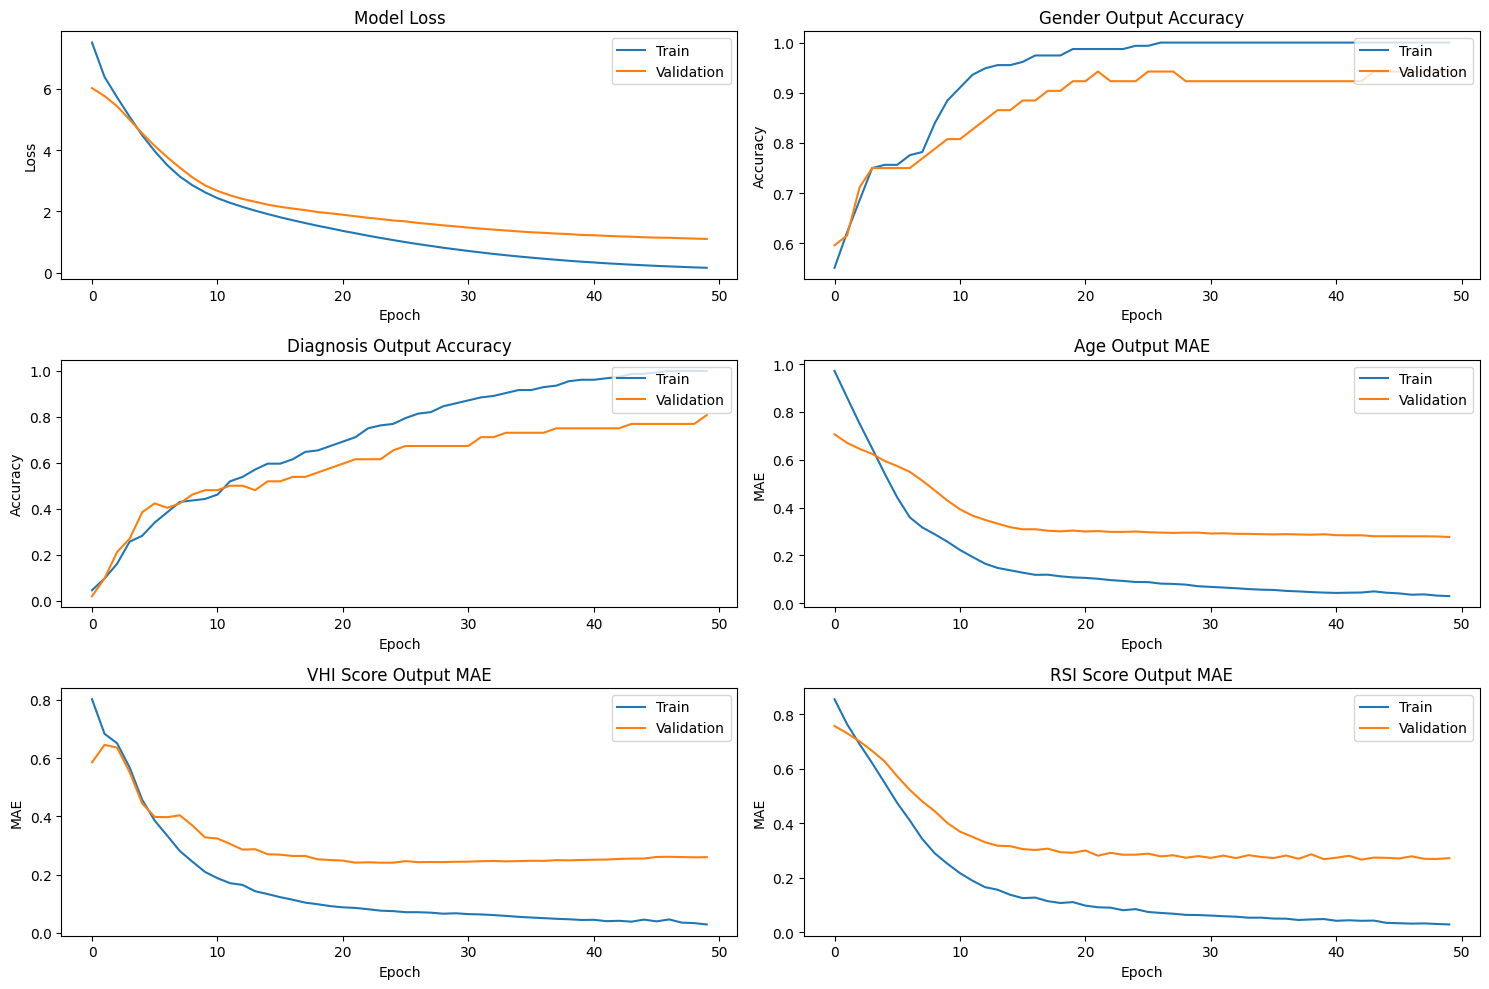

Loss and metric plots generated.


In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(15, 10))

# Overall Loss
plt.subplot(3, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Gender Accuracy
plt.subplot(3, 2, 2)
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('Gender Output Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Diagnosis Accuracy
plt.subplot(3, 2, 3)
plt.plot(history.history['diagnosis_output_accuracy'])
plt.plot(history.history['val_diagnosis_output_accuracy'])
plt.title('Diagnosis Output Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Age MAE
plt.subplot(3, 2, 4)
plt.plot(history.history['age_output_mae'])
plt.plot(history.history['val_age_output_mae'])
plt.title('Age Output MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# VHI Score MAE
plt.subplot(3, 2, 5)
plt.plot(history.history['vhi_score_output_mae'])
plt.plot(history.history['val_vhi_score_output_mae'])
plt.title('VHI Score Output MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# RSI Score MAE
plt.subplot(3, 2, 6)
plt.plot(history.history['rsi_score_output_mae'])
plt.plot(history.history['val_rsi_score_output_mae'])
plt.title('RSI Score Output MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

print("Loss and metric plots generated.")

## Final Task

### Subtask:
Summarize the neural network's architecture, training process, and evaluation results. Provide insights into its performance in predicting the metadata fields and discuss any potential next steps or improvements.


## Summary:

### Data Analysis Key Findings

*   **Data Overview**: The dataset consists of 208 audio files (`.txt`) and their corresponding metadata files (`-info.txt`).
*   **Metadata Parsing**: All metadata from the 208 `*-info.txt` files were successfully parsed into a pandas DataFrame with 23 columns. The parsing handled semi-structured formats, cleaned keys, converted numerical strings (including those with comma decimals), and processed "NU" values as `None`.
*   **Audio Feature Extraction**: Mel-frequency Cepstral Coefficients (MFCCs) were extracted from all 208 audio files. For each file, a 13-dimensional feature vector was created by calculating the mean of MFCCs across time.
*   **Data Integration**: The extracted audio features were successfully merged with the parsed metadata, resulting in a `combined_df` with 208 entries and 36 columns.
*   **Data Preprocessing**:
    *   Specific `object`-type columns intended to be numerical were converted to `float` type, correctly mapping "None" strings to `NaN`.
    *   Missing numerical values were imputed: columns with partial `NaN`s were filled with their median, while columns entirely `NaN` (e.g., 'gramme\_of\_chocolate\_eaten\_in\_\_a\_day' and 'soft\_cheese\_grams\_per\_day') were imputed with 0.
    *   Missing categorical values (e.g., 'occupation\_status') were imputed with 'Unknown'.
    *   Numerical features were scaled using `StandardScaler`, and categorical features were one-hot encoded using `OneHotEncoder`. The final feature set, `X_processed`, has a shape of (208, 116).
*   **Target Variable Preparation**: Target variables for the neural network were prepared: `gender` was `LabelEncoded` (binary), and `diagnosis` was `OneHotEncoded` (25 classes). `age`, `vhi_score`, and `rsi_score` were used directly as continuous targets.
*   **Dataset Splitting**: The processed data was split into training and testing sets with a 75/25 ratio, yielding: `X_train` (156, 116), `X_test` (52, 116), `y_train` (156, 5), and `y_test` (52, 5).
*   **Neural Network Architecture**: A multi-output neural network was designed using Keras, featuring shared hidden layers (128 and 64 units) and five distinct output heads for `gender` (sigmoid, binary cross-entropy), `diagnosis` (softmax, categorical cross-entropy), `age` (linear, MSE), `vhi_score` (linear, MSE), and `rsi_score` (linear, MSE). The model has 25,117 trainable parameters.
*   **Training and Evaluation**: The neural network was trained for 50 epochs with a batch size of 32.
    *   The model demonstrated learning, with training and validation losses generally decreasing and accuracies increasing.
    *   Final test set evaluation showed an overall loss of 1.1032. Specific losses were: `gender_output_loss`: 0.6477, `diagnosis_output_loss`: 0.1152, `age_output_loss`: 0.1135, `vhi_score_output_loss`: 0.1030, `rsi_score_output_loss`: 0.2768.

### Insights or Next Steps

*   The current neural network architecture provides a good baseline for multi-task learning on this dataset. Further optimization through hyperparameter tuning (e.g., number of layers, units, learning rate, activation functions) and regularization techniques could improve predictive performance across all output tasks.
*   Given the relatively small dataset size (208 samples), exploring data augmentation techniques for audio features or employing transfer learning from pre-trained audio models might be beneficial to enhance generalization and prevent overfitting.
